
# EDA — Breast Cancer Wisconsin (Diagnostic)

Este notebook realiza a **Análise Exploratória de Dados (EDA)** do dataset **WDBC**, base do nosso projeto de classificação (maligno vs. benigno).

**Objetivos do EDA:**
- Entender estrutura e qualidade do dado (tipos, nulos, estatísticas).
- Explorar distribuições e possíveis outliers nas features.
- Verificar correlações entre variáveis e com a variável alvo.
- Registrar insights para orientar o pré-processamento e a modelagem.


In [3]:

# Imports básicos
import os, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

# Configurações do matplotlib
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True

DATA_CSV = Path("data/raw/wdbc.csv")


## 1) Carregamento do dataset

In [4]:

# Tenta ler o CSV do repositório; se não existir, baixa do scikit-learn e salva para reprodutibilidade
if DATA_CSV.exists():
    df = pd.read_csv(DATA_CSV)
    print(f"Lido de {DATA_CSV.resolve()}")
else:
    from sklearn.datasets import load_breast_cancer
    data = load_breast_cancer(as_frame=True)
    df = data.frame
    # cria pastas e salva
    DATA_CSV.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(DATA_CSV, index=False)
    print("CSV não encontrado; carregado via scikit-learn e salvo em", DATA_CSV.resolve())

# Mostra as 5 primeiras linhas
df.head()


Lido de /Users/njunior/workspace/repos/fiap/fiap-techchalenge-f3/notebooks/data/raw/wdbc.csv


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 2) Visão geral e qualidade do dado

In [5]:

print("Shape:", df.shape)
print("\nTipos de dados:")
print(df.dtypes.value_counts())
print("\nValores nulos por coluna (top 10):")
print(df.isna().sum().sort_values(ascending=False).head(10))


Shape: (569, 31)

Tipos de dados:
float64    30
int64       1
Name: count, dtype: int64

Valores nulos por coluna (top 10):
mean radius                0
concavity error            0
worst fractal dimension    0
worst symmetry             0
worst concave points       0
worst concavity            0
worst compactness          0
worst smoothness           0
worst area                 0
worst perimeter            0
dtype: int64


In [6]:

# Estatísticas descritivas das features numéricas
desc = df.describe()
desc


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## 3) Distribuição da variável alvo

target
0    212
1    357
Name: count, dtype: int64

Proporções:
target
0    0.373
1    0.627
Name: count, dtype: float64


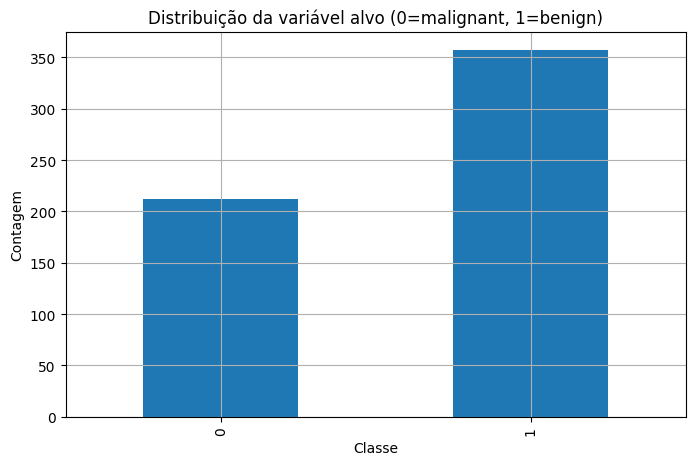

In [7]:

# Convenção do WDBC: target = 0 (malignant), 1 (benign)
target_counts = df["target"].value_counts().sort_index()
print(target_counts)
print("\nProporções:")
print((target_counts / target_counts.sum()).round(3))

fig = plt.figure()
target_counts.plot(kind="bar")
plt.title("Distribuição da variável alvo (0=malignant, 1=benign)")
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.show()


## 4) Distribuições das features (histogramas)

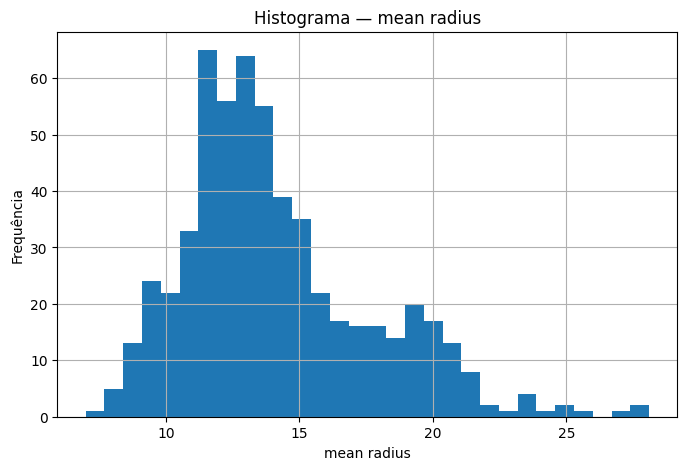

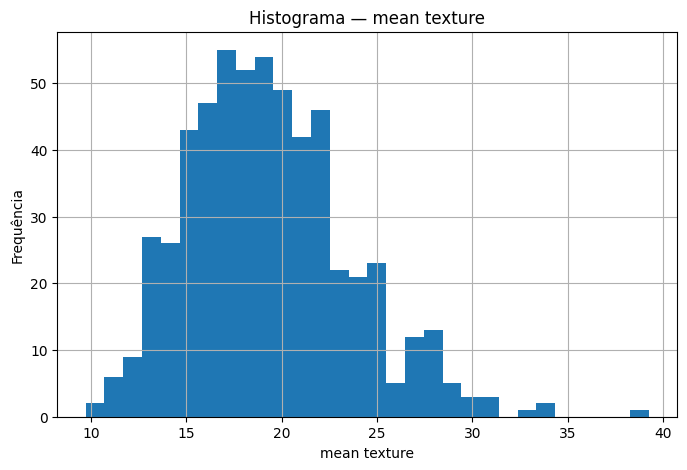

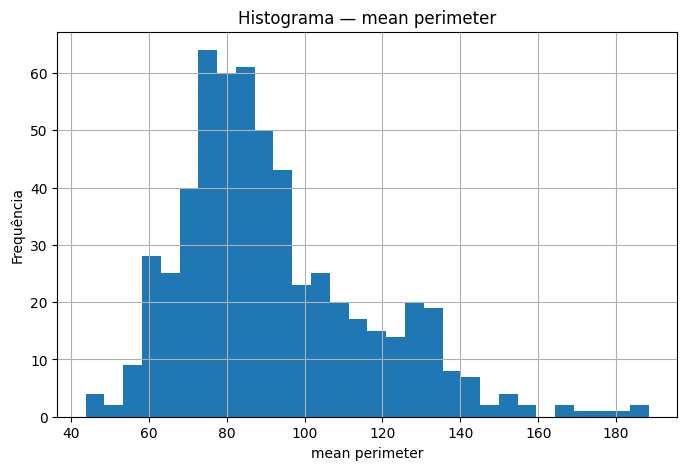

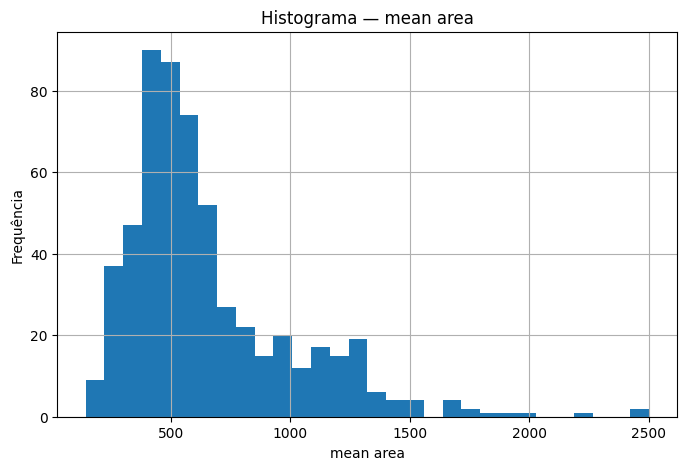

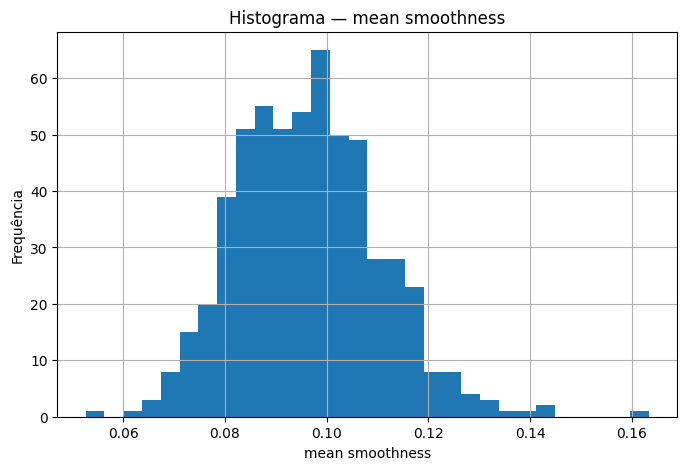

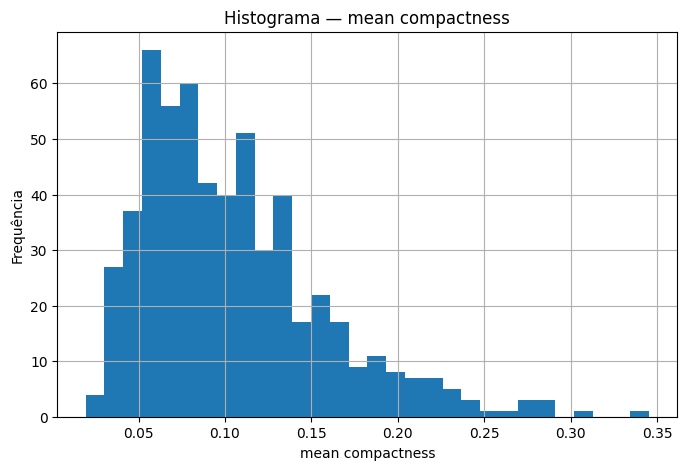

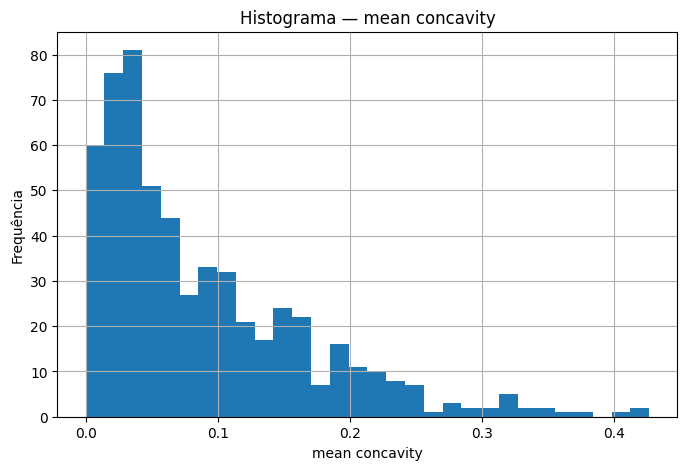

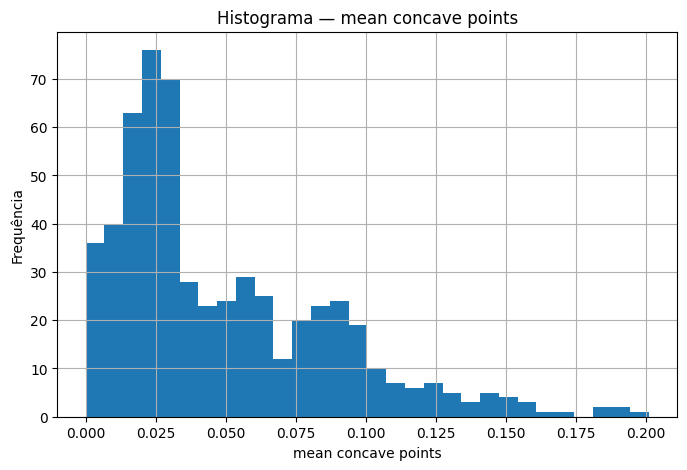

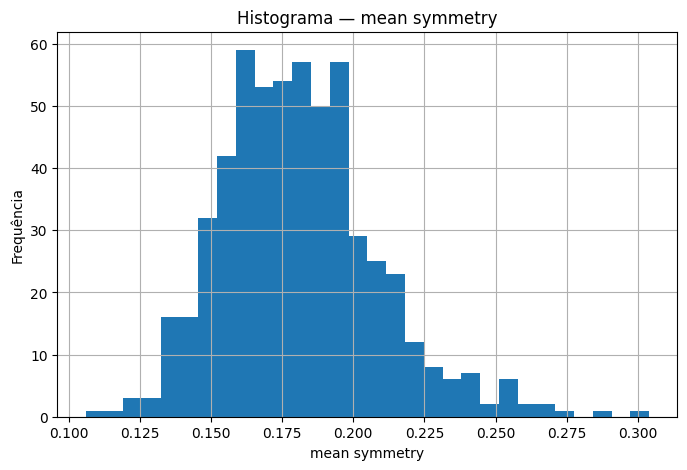

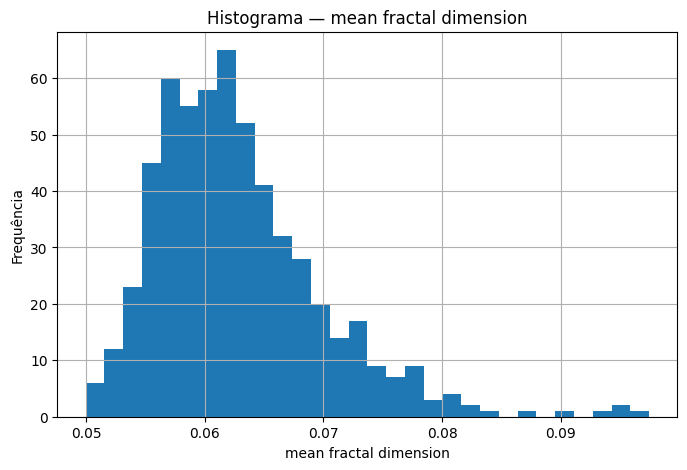

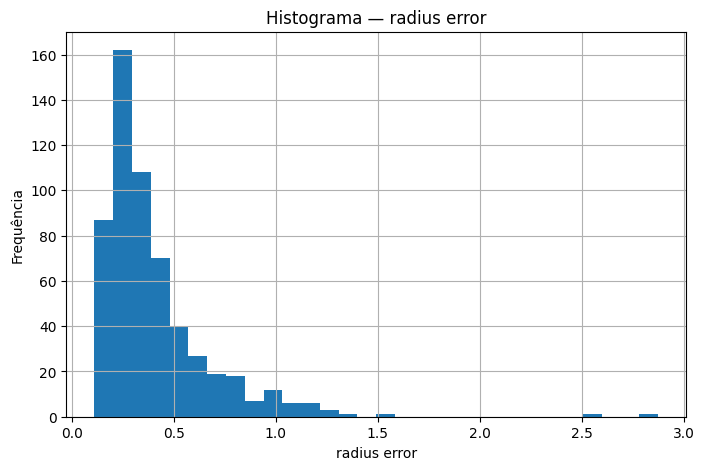

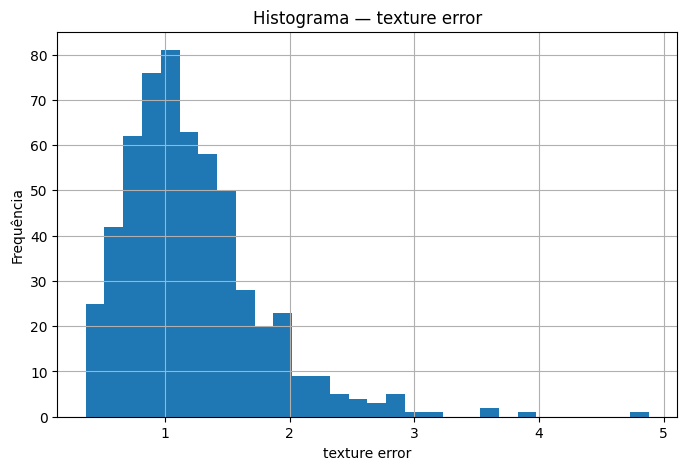

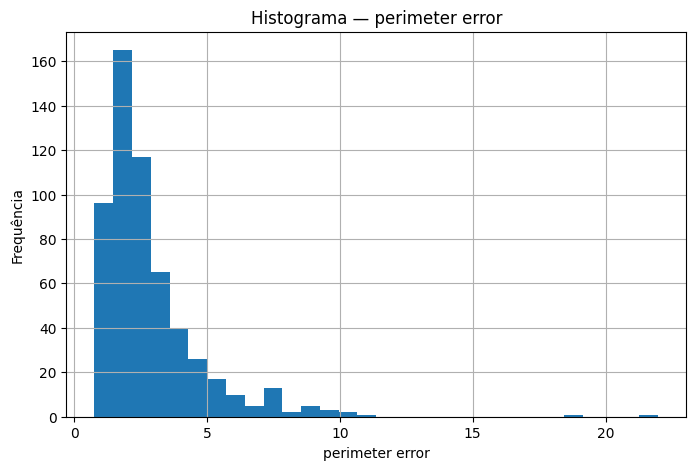

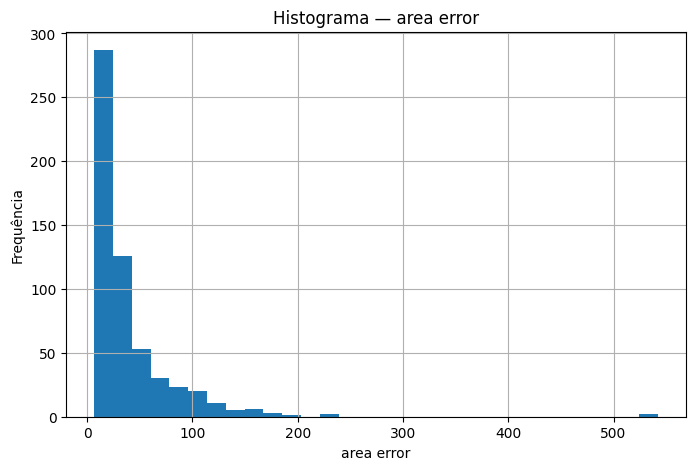

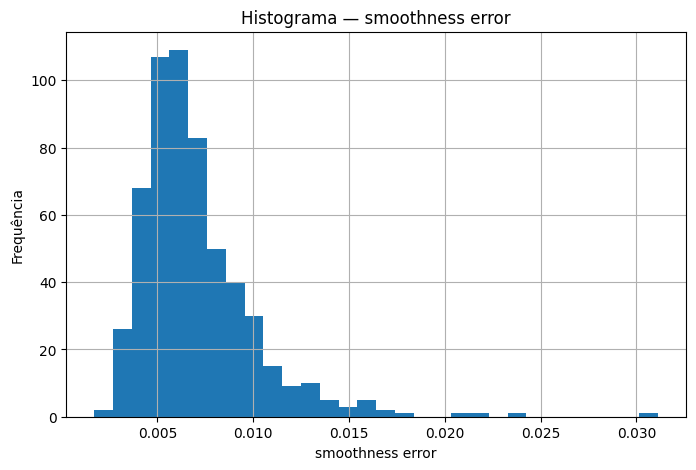

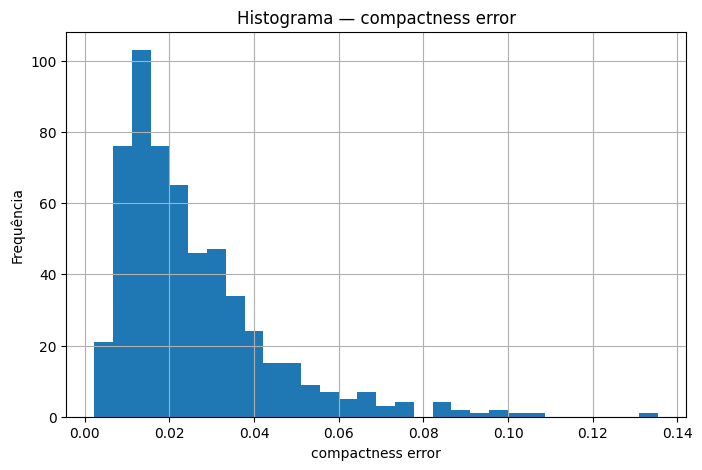

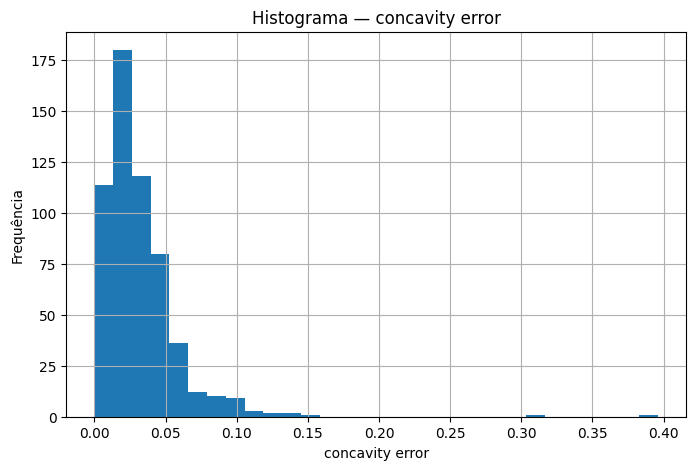

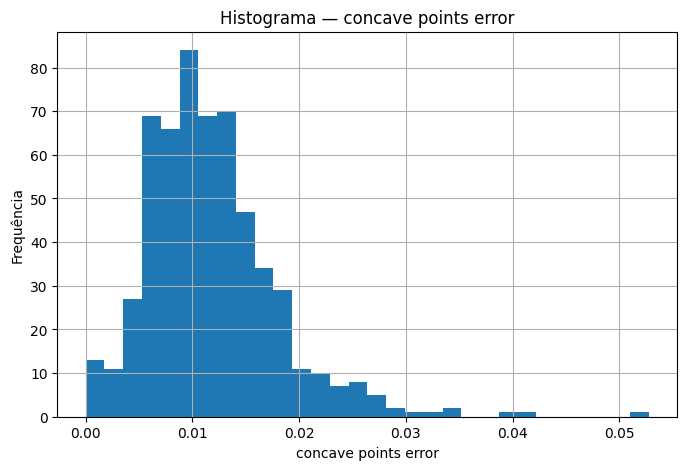

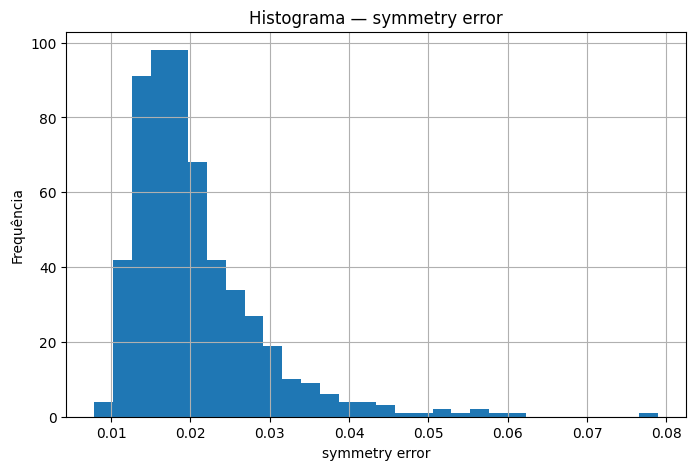

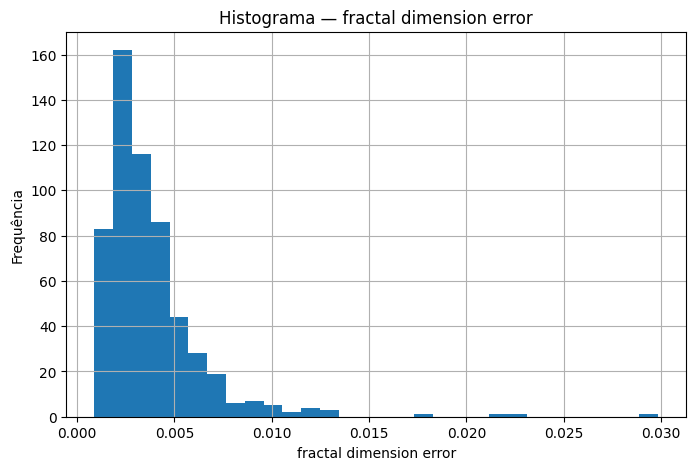

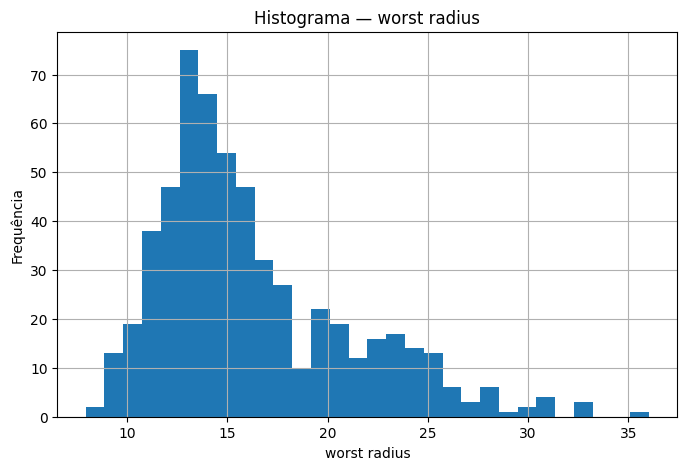

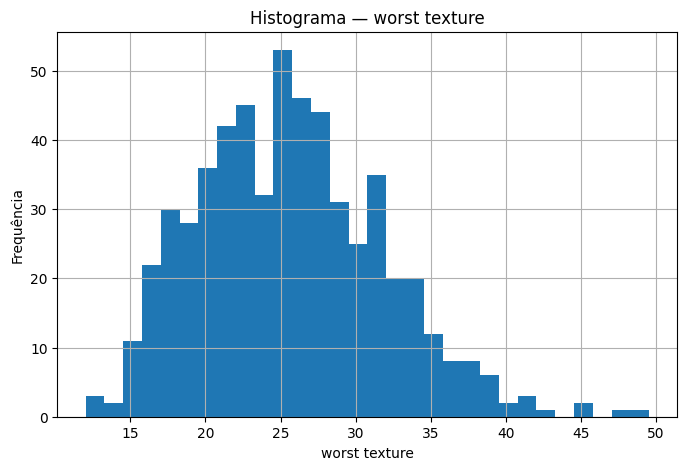

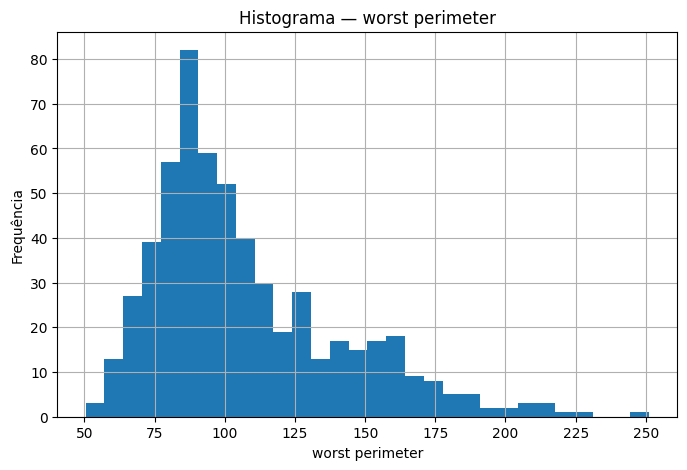

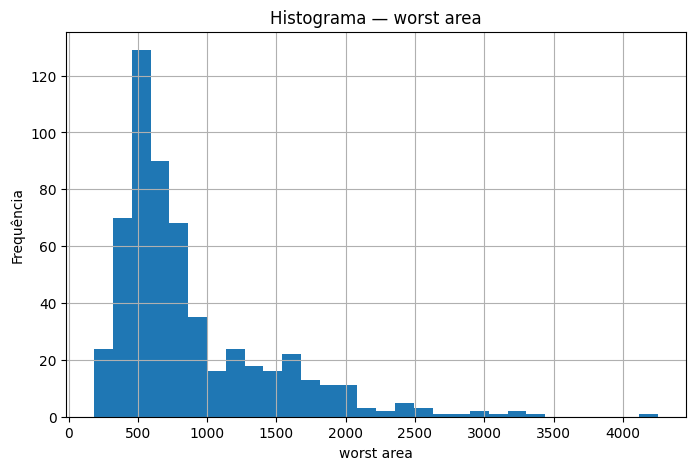

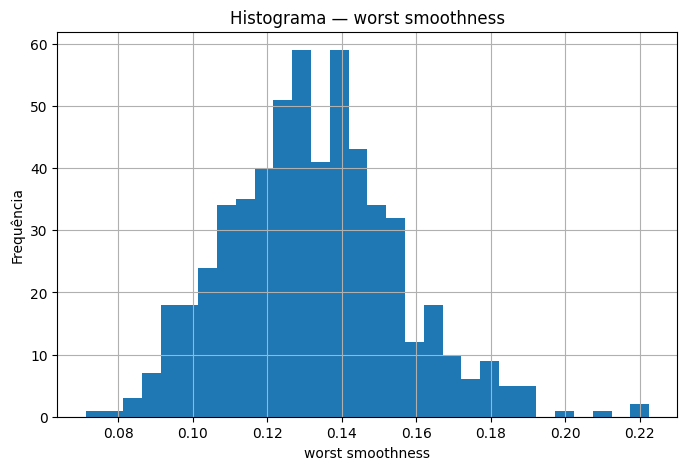

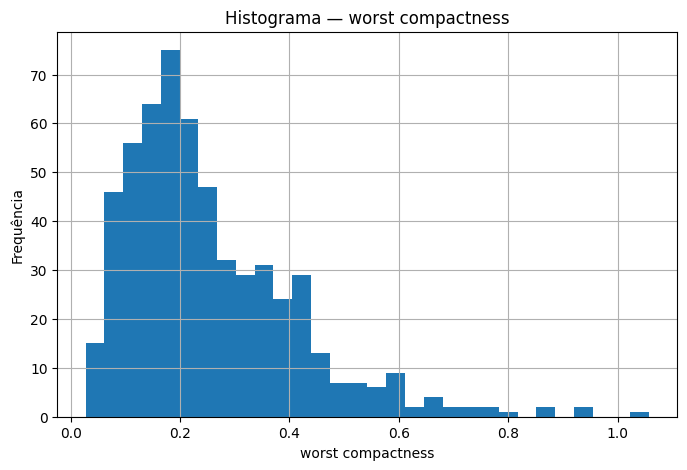

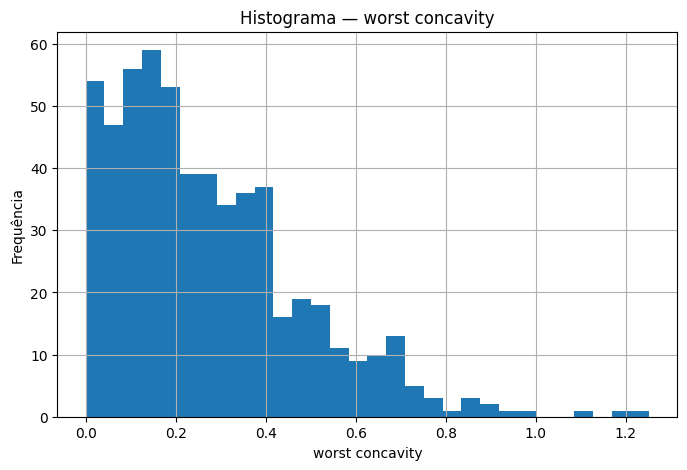

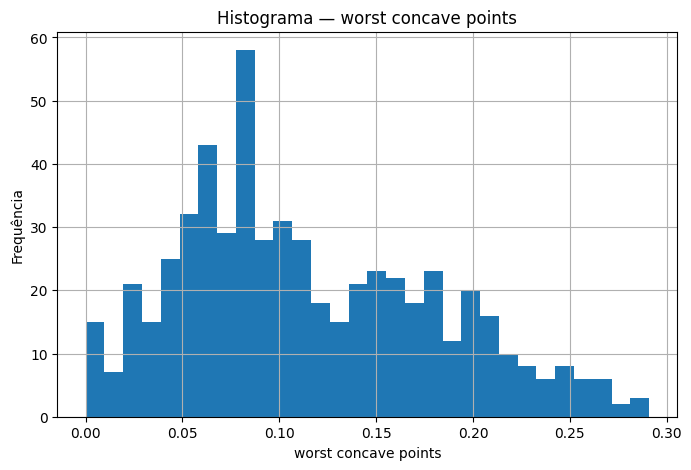

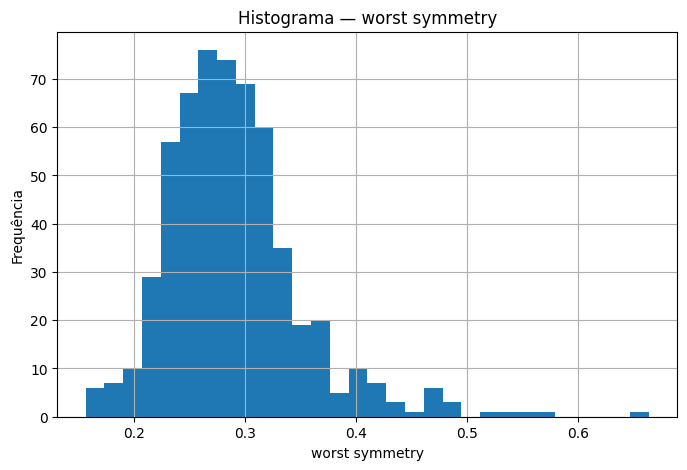

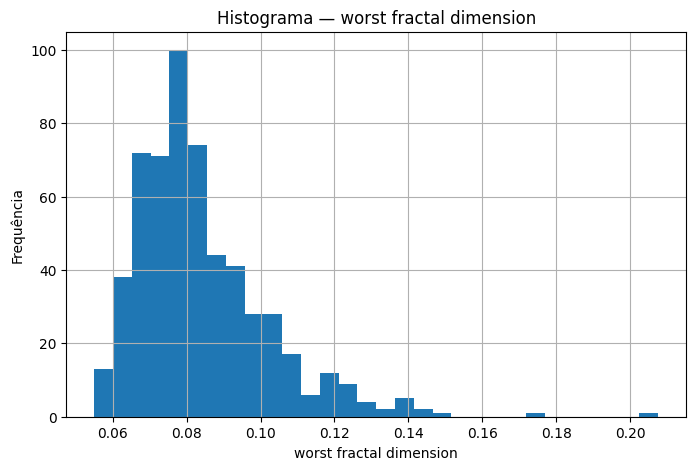

In [8]:

feature_cols = [c for c in df.columns if c != "target"]

# Gera um histograma por feature (cada gráfico em sua própria figura)
for col in feature_cols:
    fig = plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Histograma — {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()


## 5) Outliers (boxplots por feature)

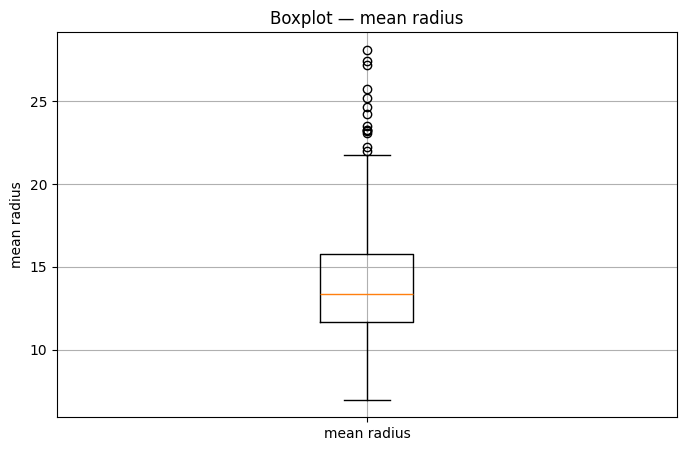

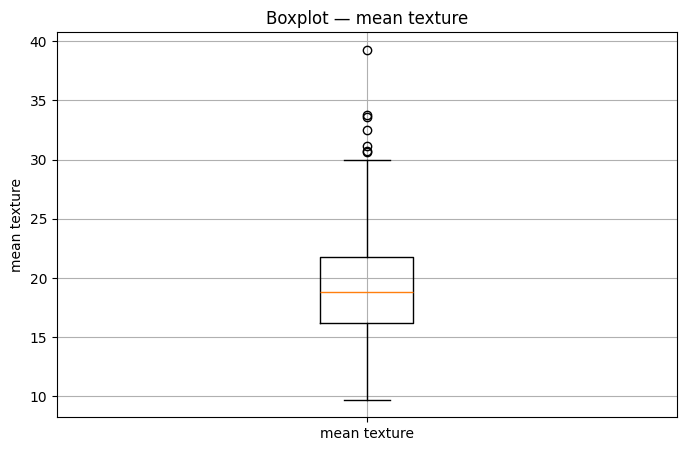

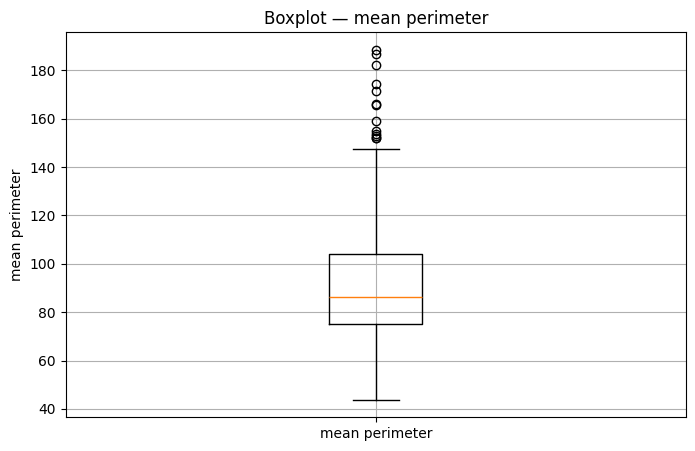

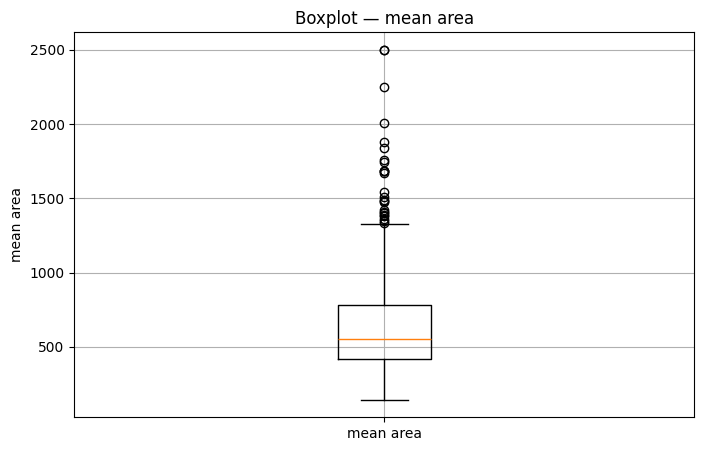

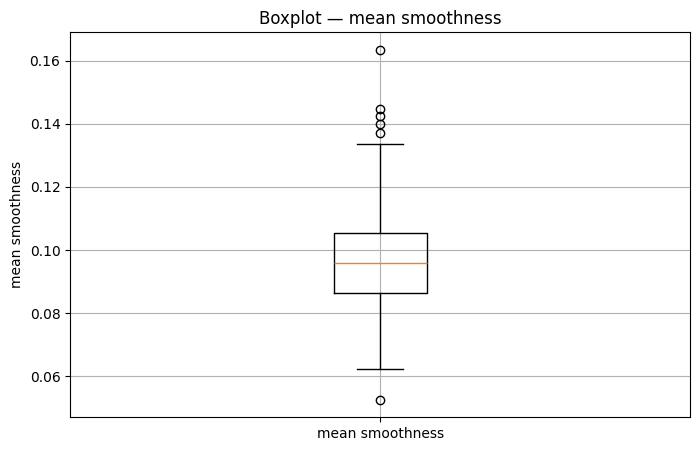

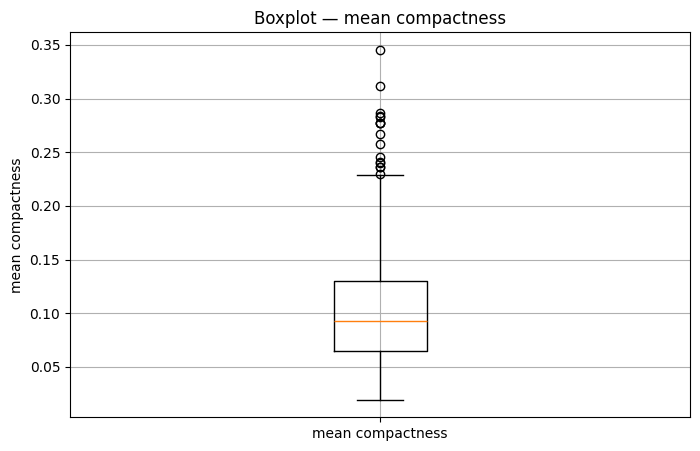

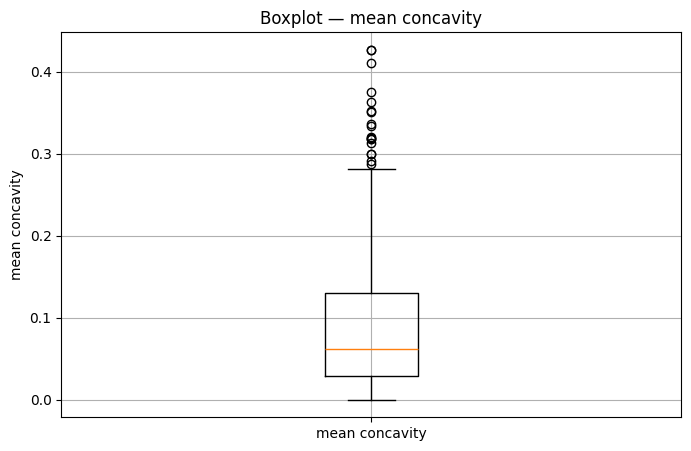

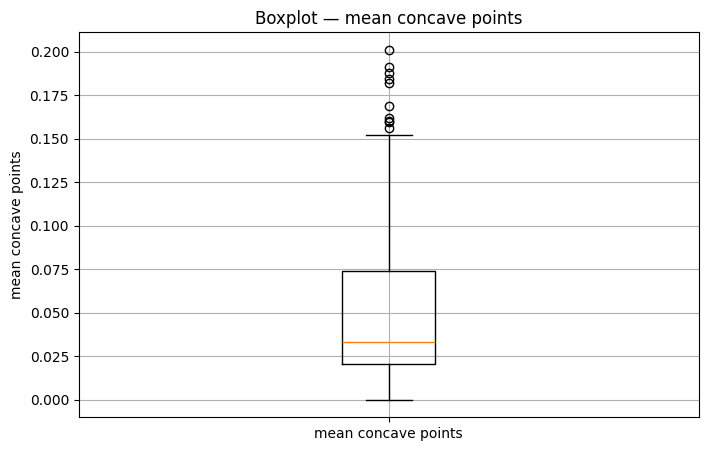

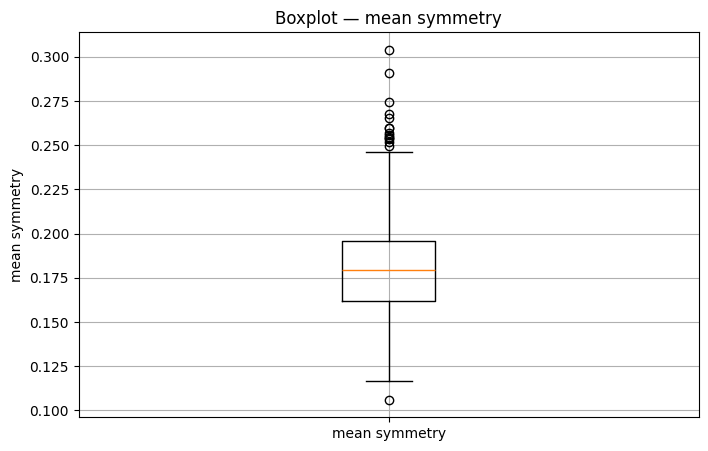

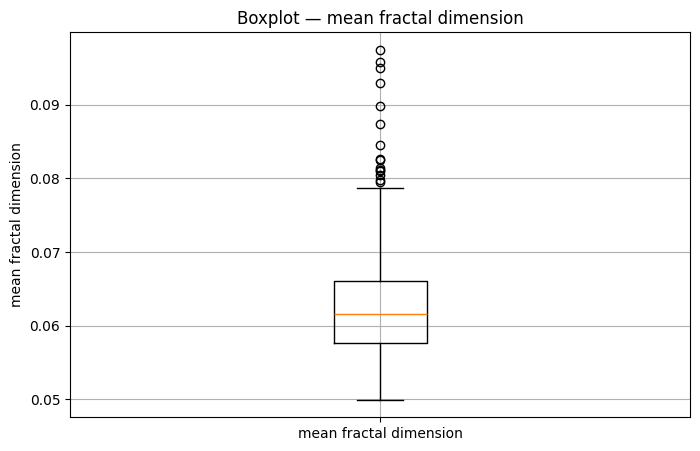

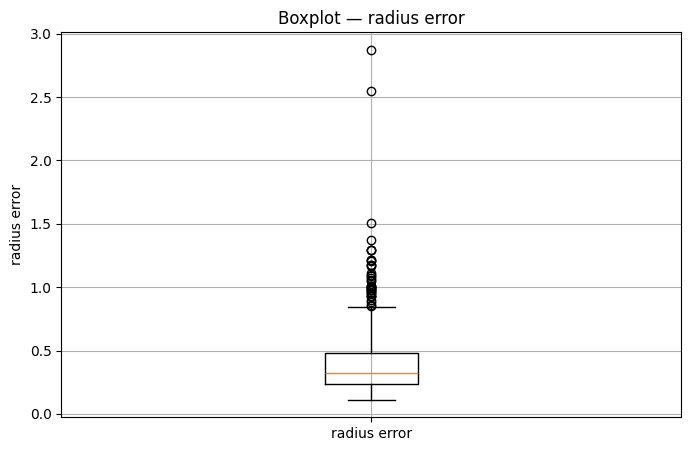

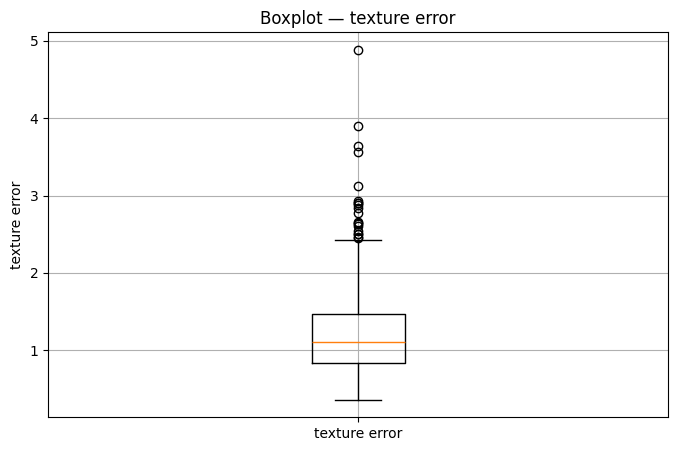

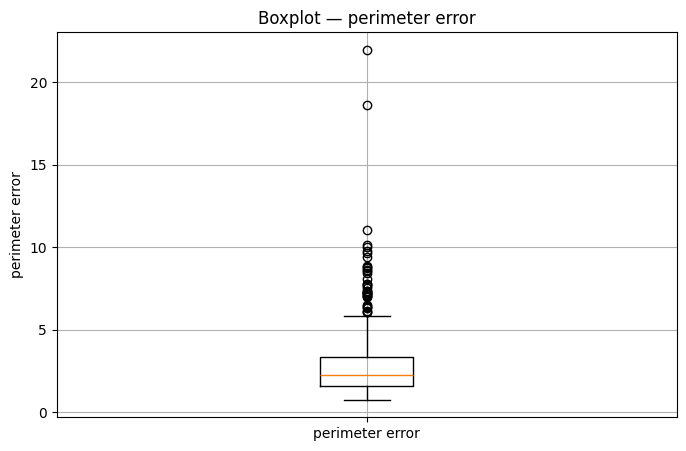

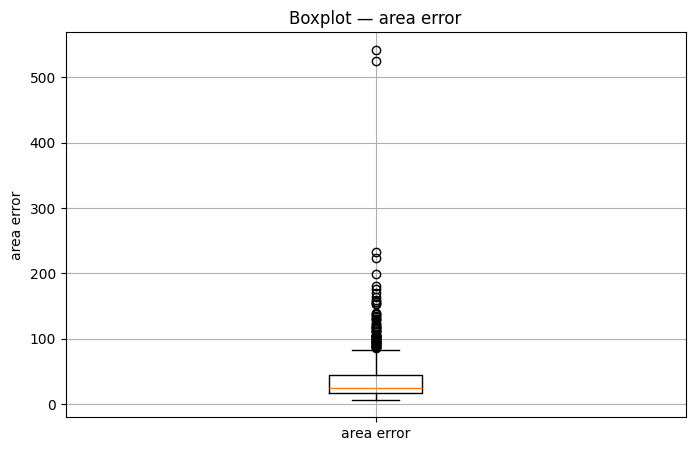

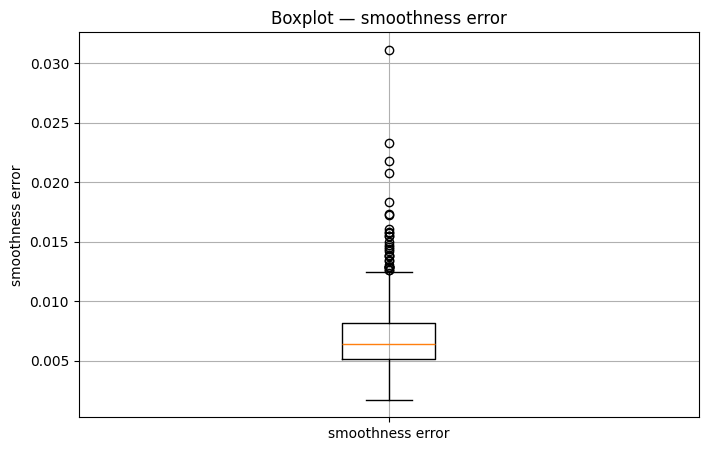

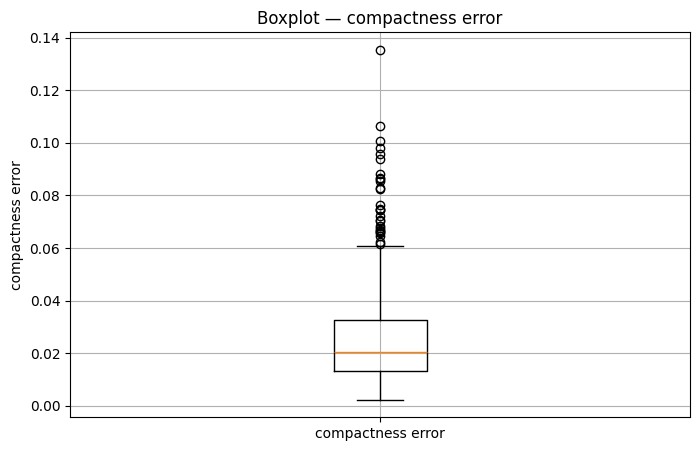

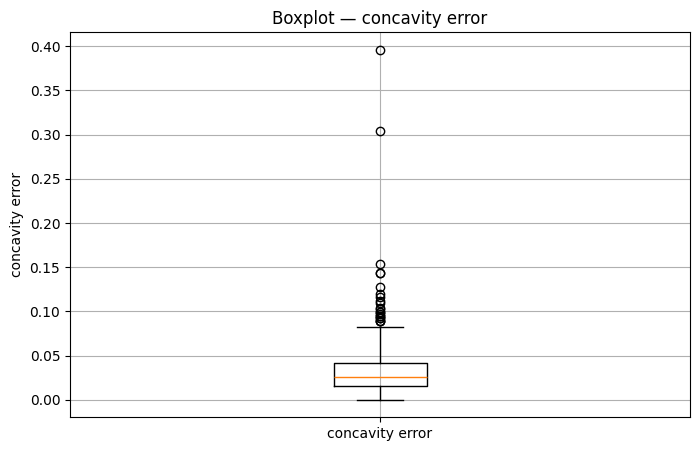

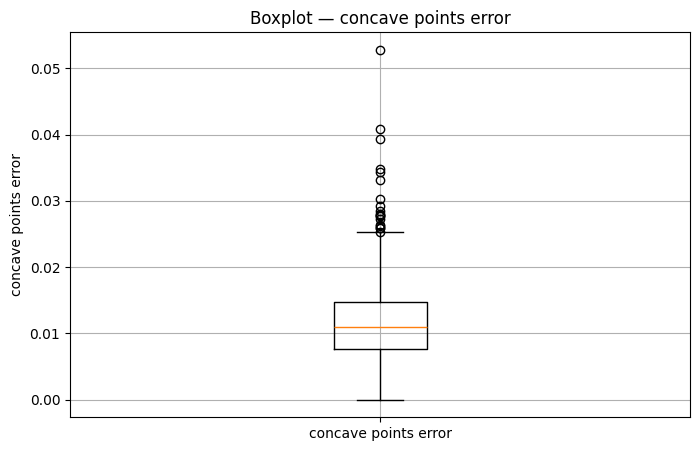

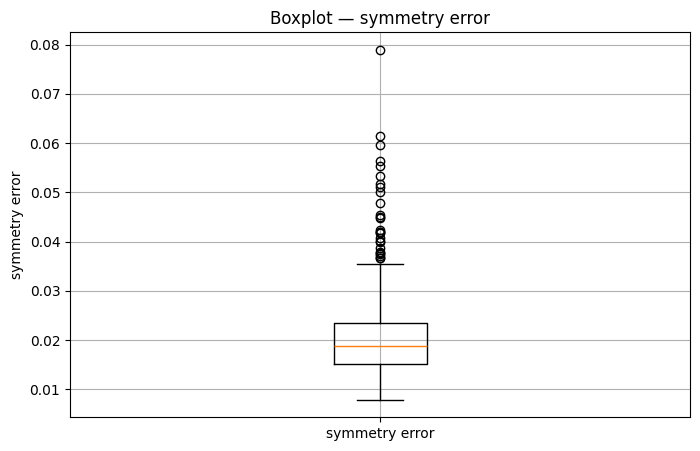

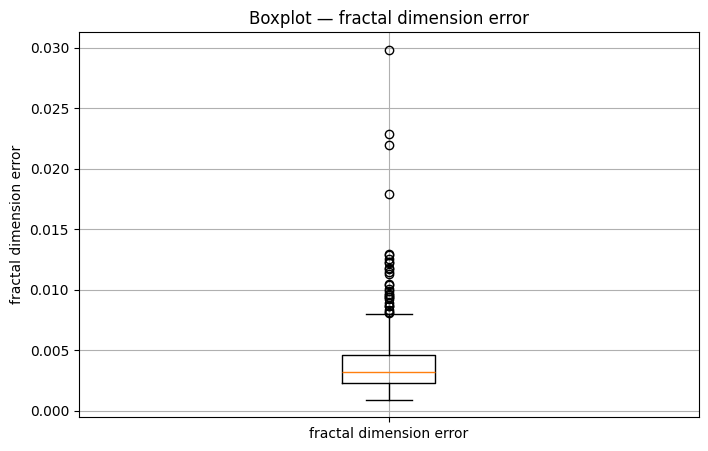

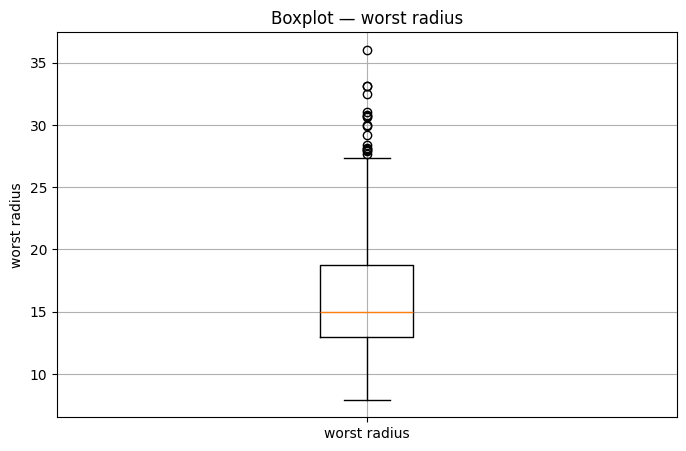

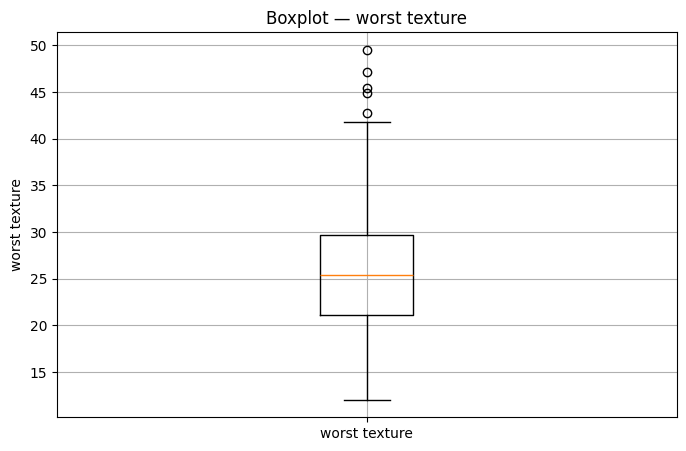

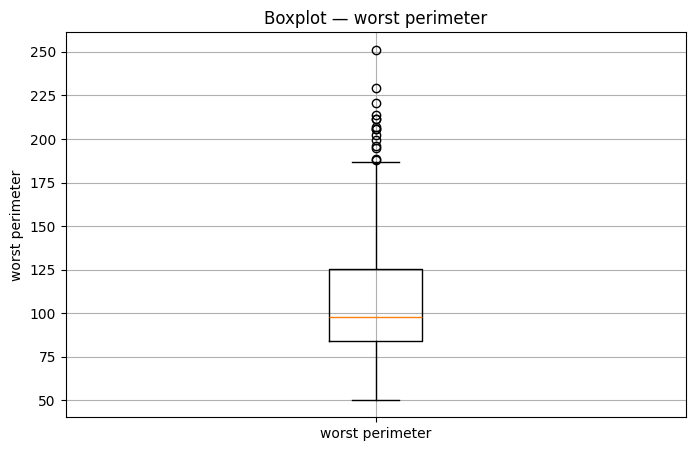

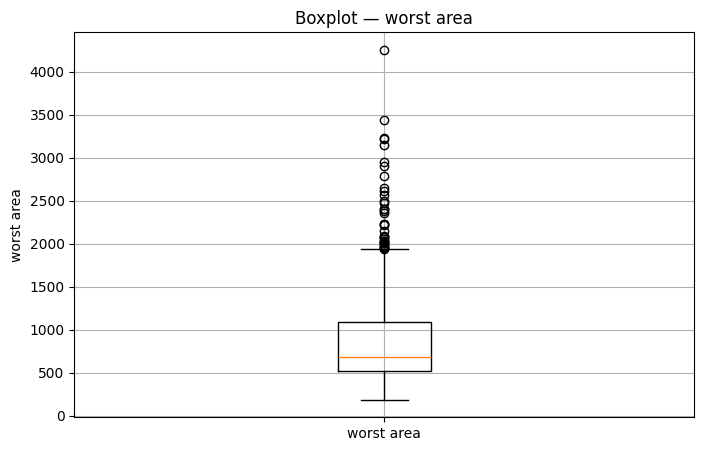

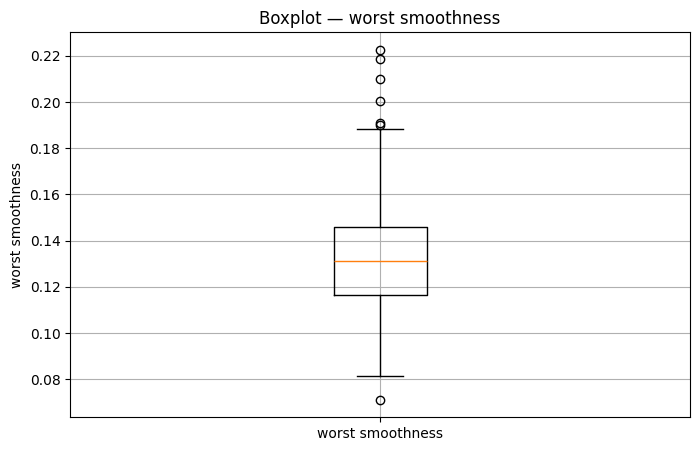

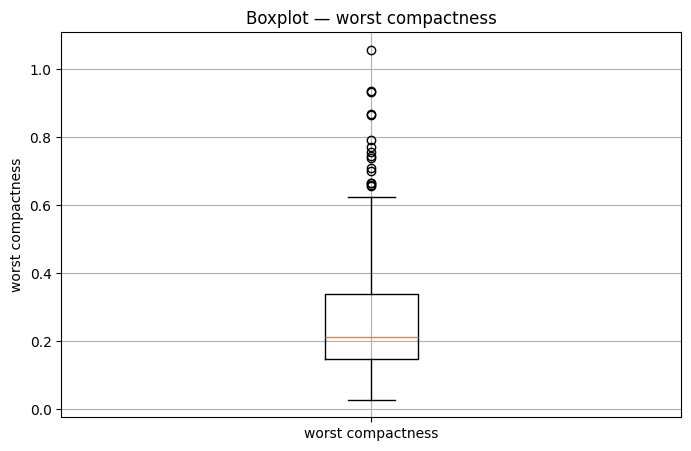

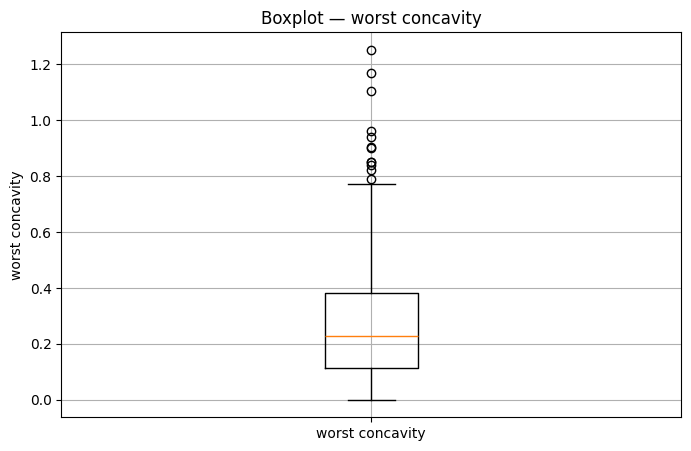

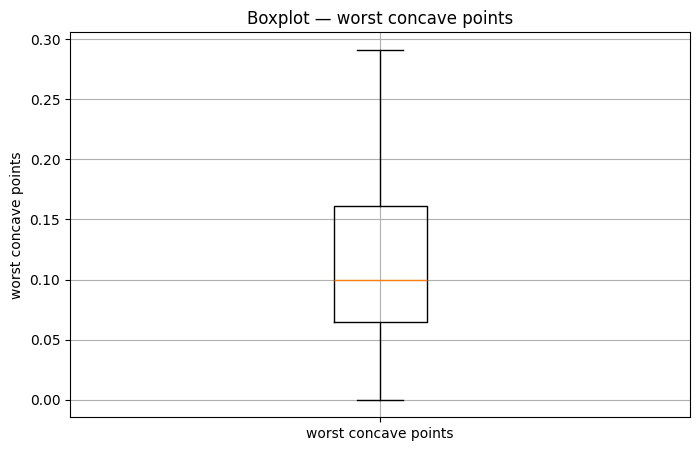

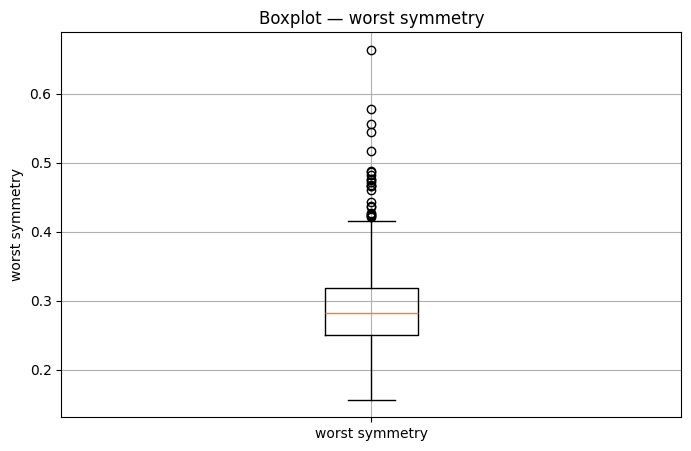

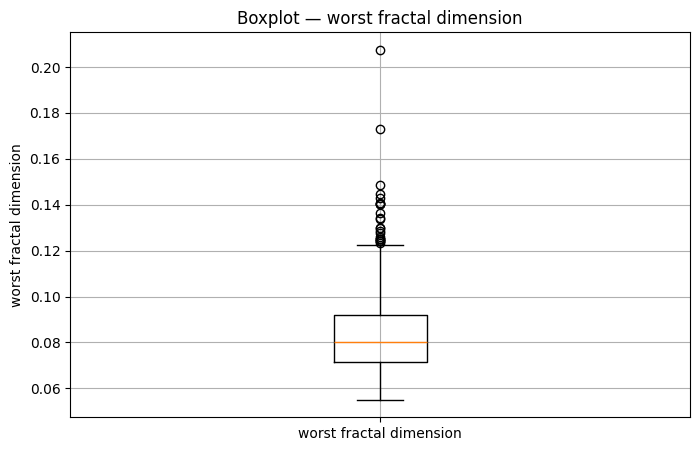

In [9]:

for col in feature_cols:
    fig = plt.figure()
    plt.boxplot(df[col].dropna(), vert=True, tick_labels=[col])
    plt.title(f"Boxplot — {col}")
    plt.ylabel(col)
    plt.show()


## 6) Correlação entre variáveis

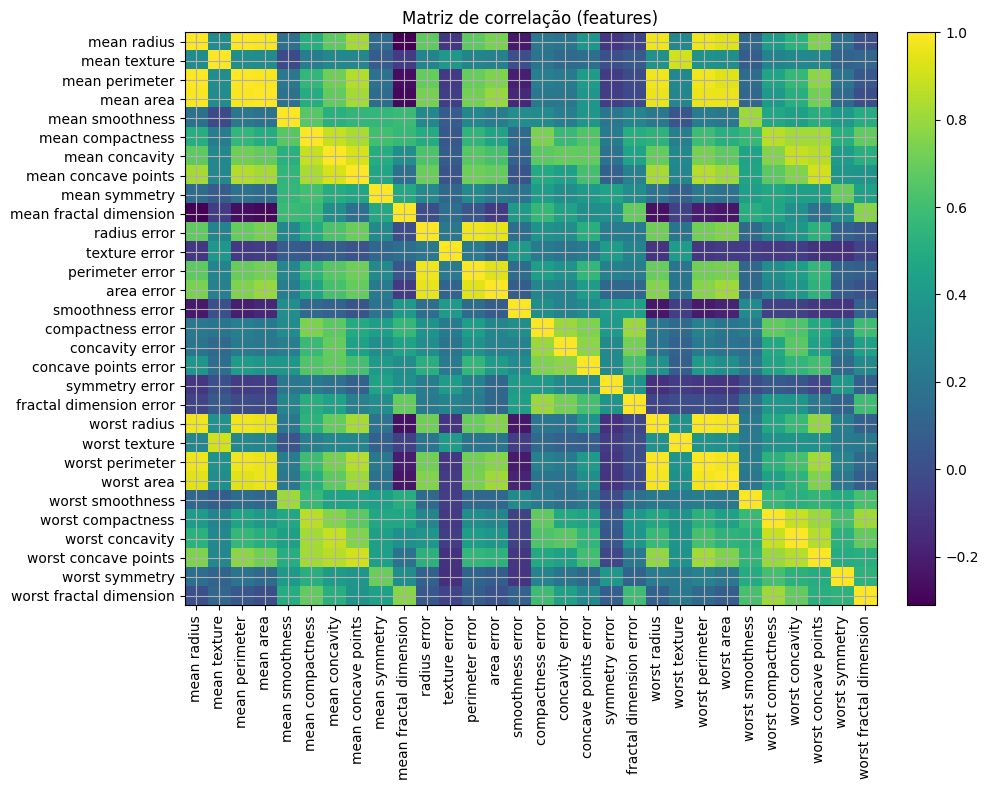

smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
dtype: float64

In [10]:

corr = df[feature_cols].corr(method="pearson")

# Salva matriz de correlação para consulta posterior
reports_dir = Path("reports")
reports_dir.mkdir(exist_ok=True, parents=True)
corr.to_csv(reports_dir / "correlation_matrix.csv")

# Heatmap simples com matplotlib (sem seaborn)
fig = plt.figure(figsize=(10, 8))
im = plt.imshow(corr.values, cmap="viridis", aspect="auto")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title("Matriz de correlação (features)")
plt.xticks(ticks=range(len(feature_cols)), labels=feature_cols, rotation=90)
plt.yticks(ticks=range(len(feature_cols)), labels=feature_cols)
plt.tight_layout()
plt.show()

# Correlação com o alvo (usando point-biserial ~ Pearson entre numérico e binário)
corr_with_target = df[feature_cols].corrwith(df["target"]).sort_values(ascending=False)
corr_with_target.head(10)



## 7) Insights e próximos passos

- **Balanceamento de classes**: verifique a proporção de 0/1 na célula anterior para decidir se é necessário ajustar `class_weight` (no nosso treino já usamos isso onde faz sentido).
- **Escalas**: as features estão em escalas diferentes; por isso usamos **padronização** no pipeline.
- **Correlação**: grupos de features podem estar altamente correlacionados (potencial multicolinearidade). Eventualmente pode-se testar **PCA** ou selecionar subconjuntos.
- **Outliers**: verificados nos boxplots; modelos baseados em distância podem ser sensíveis (outra razão para escalonamento).
- **Próximo**: voltar ao `train.py` para validar modelos (LogReg, Árvore, RF, SVC) e confirmar o campeão.
